In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

## Download Images into tf.images.dataset

In [2]:
Image_size = 256
Batch_size = 32
Channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato_Data',
    shuffle=True,
    image_size= (Image_size,Image_size),
    batch_size= Batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

## Data visualization

In [6]:
for image_batch , label_batch in dataset.take(1) :  # It gives us one batch which equals to 32 images 
    print(image_batch[0].numpy()) # because it is a tensor 


[[[157. 160. 177.]
  [155. 158. 175.]
  [156. 159. 176.]
  ...
  [113. 111. 125.]
  [114. 112. 126.]
  [100.  98. 112.]]

 [[152. 155. 172.]
  [151. 154. 171.]
  [151. 154. 171.]
  ...
  [105. 103. 117.]
  [107. 105. 119.]
  [116. 114. 128.]]

 [[152. 155. 172.]
  [150. 153. 170.]
  [150. 153. 170.]
  ...
  [102. 100. 114.]
  [103. 101. 115.]
  [118. 116. 130.]]

 ...

 [[149. 152. 161.]
  [150. 153. 162.]
  [150. 153. 162.]
  ...
  [112. 109. 116.]
  [105. 102. 109.]
  [113. 110. 117.]]

 [[148. 151. 160.]
  [149. 152. 161.]
  [150. 153. 162.]
  ...
  [111. 108. 115.]
  [ 98.  95. 102.]
  [108. 105. 112.]]

 [[149. 152. 161.]
  [150. 153. 162.]
  [152. 155. 164.]
  ...
  [115. 112. 119.]
  [100.  97. 104.]
  [113. 110. 117.]]]


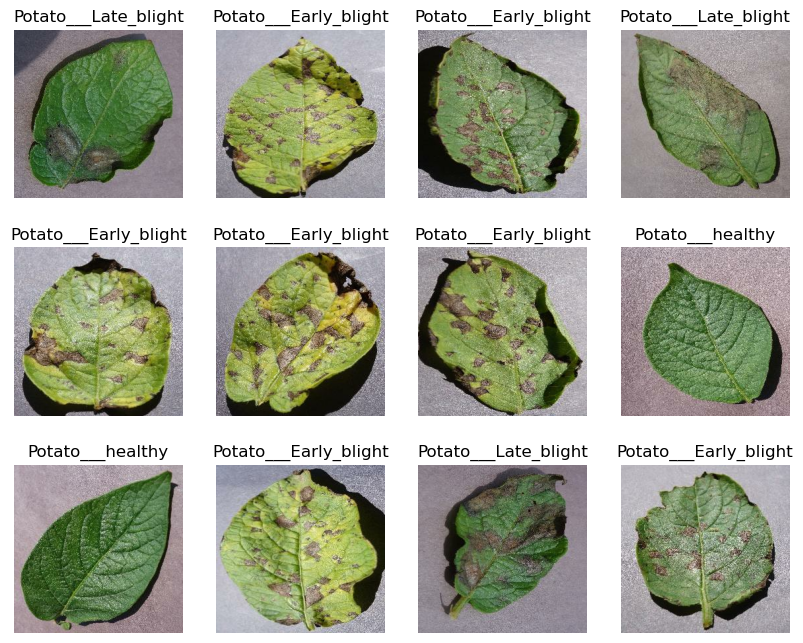

In [7]:


plt.figure(figsize=(10,8))
for image_batch , label_batch in dataset.take (1) :
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

## Train Test Split

In [8]:
len(dataset)

68

In [9]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,len(dataset))

In [11]:
print('Length of Train ds :',len(train_ds))
print('Length of Validation ds :',len(val_ds))
print('Length of Test ds :',len(test_ds))

Length of Train ds : 54
Length of Validation ds : 6
Length of Test ds : 8


In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resizing_rescaling = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [14]:
data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# Model building

In [15]:
input_shape = (Batch_size,Image_size,Image_size,Channels)
n_classes = 3 
model = models.Sequential([
    
    resizing_rescaling,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [17]:
model.compile( 
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
model.fit(
    train_ds,
    epochs=50,
    batch_size=Batch_size,
    verv
)